### Daytum Course: Spatial Data Analytics

#### Indicator Kriging Demonstration

Let's talk about kriging and then the indicator approach.

#### Properties of Kriging

Here are some important properties of kriging:

* **Exact interpolator** - kriging estimates with the data values at the data locations
  
* **Kriging variance** can be calculated before getting the sample information, as the kriging estimation variance is not dependent on the values of the data nor the kriging estimate, i.e. the kriging estimator is homoscedastic.
  
* **Spatial context** - kriging takes into account, furthermore to the statements on spatial continuity, closeness and redundancy we can state that kriging accounts for the configuration of the data and structural continuity of the variable being estimated.
  
* **Scale** - kriging may be generalized to account for the support volume of the data and estimate. We will cover this later.
  
* **Multivariate** - kriging may be generalized to account for multiple secondary data in the spatial estimate with the cokriging system. We will cover this later.
  
* **Smoothing effect** of kriging can be forecast. We will use this to build stochastic simulations later.

#### Indicator Formalism

Here we use indicator methods to estimate a categorical feature in space, but there are many more aspects of indicator methods that we could cover:

* Estimation and Simulation with categorical variables with explicit control of spatial continuity of each category
* Estimation and simulation with continuous variables with explicit control of the spatial continuity of different magnitudes
* Requires indicator coding of data, a probability coding based on category or threshold
* Requires indicator variograms to describe the spatial continuity.

If $i(\bf{u}:z_k)$ is an indicator for a categorical variable,  

* what is the probability of a realization equal to a category?

$$
i(\bf{u}; z_k) =
\begin{cases} 
    1, & \text{if } Z(\bf{u}) = z_k \\
    0, & \text{if } Z(\bf{u}) \ne z_k 
\end{cases}
$$

for example, 

* given threshold, $z_2 = 2$, and data at $\bf{u}_1$, $z(\bf{u}_1) = 2$, then $i(bf{u}_1; z_2) = 1$
* given threshold, $z_1 = 1$, and a RV away from data, $Z(\bf{u}_2)$ then is calculated as $F^{-1}_{\bf{u}_2}(z_1)$ of the RV as $i(\bf{u}_2; z_1) = 0.23$

If $i(\bf{u}:z_k)$ is an indicator for a continuous variable,  

* what is the probability of a realization less than or equal to a threshold?

$$
i(\bf{u}; z_k) =
\begin{cases} 
    1, & \text{if } Z(\bf{u}) \le z_k \\
    0, & \text{if } Z(\bf{u}) > z_k 
\end{cases}
$$

for example,

* given threshold, $z_1 = 6\%$, and data at $\bf{u}_1$, $z(\bf{u}_1) = 8\%$, then $i(\bf{u}_1; z_1) = 0$
* given threshold, $z_4 = 18\%$, and a RV away from data, $Z(\bf{u}_2) = N\left[\mu = 16\%,\sigma = 3\%\right]$ then $i(\bf{u}_2; z_4) = 0.75$

The indicator coding may be applied over an entire random function by indicator transform of all the random variables at each location.

#### Indicator Variogram

Variogram's calculated and modelled from the indicator transform of spatial data and used for indicator kriging. The indicator variogram is,

$$
\gamma_i(\mathbf{h}; z_k) = \frac{1}{2N(\mathbf{h})} 
\sum_{\alpha=1}^{N(\mathbf{h})} 
\left[ i(\mathbf{u}_\alpha; z_k) - i(\mathbf{u}_\alpha + \mathbf{h}; z_k) \right]^2
$$

where $i(\mathbf{u}_\alpha; z_k)$ and $i(\mathbf{u}_\alpha + \mathbf{h}; z_k)$ are the indicator transforms for the $z_k$ threshold at the tail location $\mathbf{u}_\alpha$ and head location $\mathbf{u}_\alpha + \mathbf{h}$ respectively. 

* for hard data the indicator transform $i(\bf{u},z_k)$ is either 0 or 1, in which case the $\left[ i(\mathbf{u}_\alpha; z_k) - i(\mathbf{u}_\alpha + \mathbf{h}; z_k) \right]^2$ is equal to 0 when the values at head and tail are both $\le z_k$ (for continuous features) or $= z_k$  (for categorical features), the same relative to the threshold, or 1 when they are different.

* therefore, the indicator variogram is $\frac{1}{2}$ the proportion of pairs that change! The indicator variogram can be related to probability of change over a lag distance, $h$.

* the sill of an indicator variogram is the indicator variance calculated as,

$$
\sigma_i^2 = p \cdot (1 - p)
$$ 

where $p$ is the proportion of 1's (or zeros as the function is symmetric over proportion)


#### Indicator Kriging

The application of simple kriging to a set of *indicator transforms*, one for each threshold for a continuous features, or one for each category for cateogorical features, of the data to directly estimate the local uncertainty model *cumulative distribution function* at an unknown location, $\bf{u}$.

The indicator kriging estimator is defined as,

$$
p^*_{IK}(\mathbf{u}; k) =
\sum_{\alpha=1}^n \lambda_\alpha(k) \cdot i(\mathbf{u}_\alpha; k) 
+ \left( 1 - \sum_{\alpha=1}^n \lambda_\alpha(k) \right) \cdot p(k)
$$

where $\lambda_\alpha(k)$ is the indicator kriging weight for data $\alpha$ and category or threshold $k$, $i(\mathbf{u}_\alpha; k)$ is the $k$ category or threshold indicator transform of the data at location $\mathbf{u}_\alpha$ and $p(k)$ is the global or local mean categorical probability (if a trend model is provided) or the continuous cumulative probability.

* by estimating probability $p^*_{IK}(\mathbf{u}; k)$ for each threshold or category we are directly estimating the distribution of uncertainty at an unsampled location without any distribution assumption (i.e., no Gaussian assumption)

The steps for indicator kriging are,

1. Establish a series of thresholds or categories:  

* for categorical features, the categories are given 

* for continuous features, the thresholds should cover the entire range of the feature with enough thresholds to represent the local distributions of uncertainty (so we can resolve the local *cumulative distribution function*'s)

* for continuous features, the thresholds may be related to critical thresholds, e.g., environmental limits, economic thresholds. 

2. Apply indicator transformation to the data

3. Calculate the *indicator variogram* from the indicator transformation of the data for each threshold or category

4. Apply indicator kriging to estimate the cumulative probability for continuous features or probability for categorical features at an unsampled location, using the indicator variogram for each threshold or category

5. Correct the final cumulative distribution function to be valid, this is called the *order relations correction*. 

* since each threshold's cumulative probability is estimated by indicator kriging separately, the resulting cumulative distribution function may not be valid, i.e., non-monotonic increasing

* since each category's probability is estimated by indictor kriging separately, the probabilities may not sum to one

General comments,

* a variogram model is needed for each threshold or category; therefore, a more difficult inference problem, however, there is greater flexibility as spatial continuity may vary by value, for example, greater spatial continuity for upper tail of the feature distribution 

* more readily integrates data of different types through soft data encoding, for example, we could assign a *random variable* (distribution) at data locations instead of a single value


#### Order Relations Correction

Due to the separate estimation of each cumulative probability over each threshold with indicator kriging the cumulative distribution may not be valid, for example,

* nonmonotonic behavior for continuous features

* sum of categorical probabilities not equal to one (fail to honor probability closure)

For categorical features the order relations correction is the same as the L1 normalizer (machine learning feature transformations),

$$
i(\bf{u}_{\alpha};z_k)^{\prime} = \frac{i(\bf{u}_{\alpha};z_k)}{\sum_{i=1}^K i(\bf{u}_{\alpha};z_i)}
$$

* cumulative probability for each threshold $i(\bf{u}_{\alpha};z_k)$ are divided by the sum of all the cumulative probabilities, $\sum_{i=1}^K i(\bf{u}_{\alpha};z_i)$ to ensure they sum to 1.0

For continuous features this involves a two pass calculation that results in two possible cumulative distribution functions that are monotonic increasing that are then averaged to get the corrected result (see my lecture, [Indicator Methods](https://youtu.be/6mCfgbh7f2g?si=gcbW0V0zvP1UfNxu)).


#### Load the required libraries

The following code loads the required libraries.

In [37]:
import os                                                 # to set current working directory 
import numpy as np                                        # arrays and matrix math
import pandas as pd                                       # DataFrames
import matplotlib.pyplot as plt                           # plotting

import geostatspy.geostats as geostats
import geostatspy.GSLIB as GSLIB
import warnings
warnings.filterwarnings('ignore')

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [40]:
#os.chdir("C:working")

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.  For fun try misspelling the name. You will get an ugly, long error. 

In [43]:
#df = pd.read_csv('12_sample_data.csv')     # load our data table
df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/12_sample_data.csv')

We loaded our file into our DataFrame called 'df'. But how do you really know that it worked? Visualizing the DataFrame would be useful and we already leard about these methods in this demo (https://git.io/fNgRW). 

We can preview the DataFrame by printing a slice or by utilizing the 'head' DataFrame member function (with a nice and clean format, see below). With the slice we could look at any subset of the data table and with the head command, add parameter 'n=13' to see the first 13 rows of the dataset.  

In [46]:
df.head(n=13)                           # we could also use this command for a table preview

,Unnamed: 0,X,Y,Facies,Porosity,Perm,AI
0,1,50.0,900.0,1.0,0.220761,140.021266,3413.063944
1,2,50.0,850.0,1.0,0.237154,39.837129,3074.562617
2,3,50.0,800.0,1.0,0.234352,84.992437,2292.783358
3,4,50.0,750.0,1.0,0.244553,90.632307,2494.848885
4,5,50.0,700.0,1.0,0.231787,811.547979,2522.063995
5,6,50.0,650.0,1.0,0.233280,426.992456,3964.185956
6,8,50.0,550.0,1.0,0.234423,2398.406492,3318.885844
7,9,50.0,500.0,1.0,0.219657,1637.224971,3030.874323
8,10,50.0,450.0,1.0,0.200389,265.636019,3454.389302
9,12,50.0,350.0,0.0,0.165908,7.951511,5025.286221


#### Set up the Model Grid

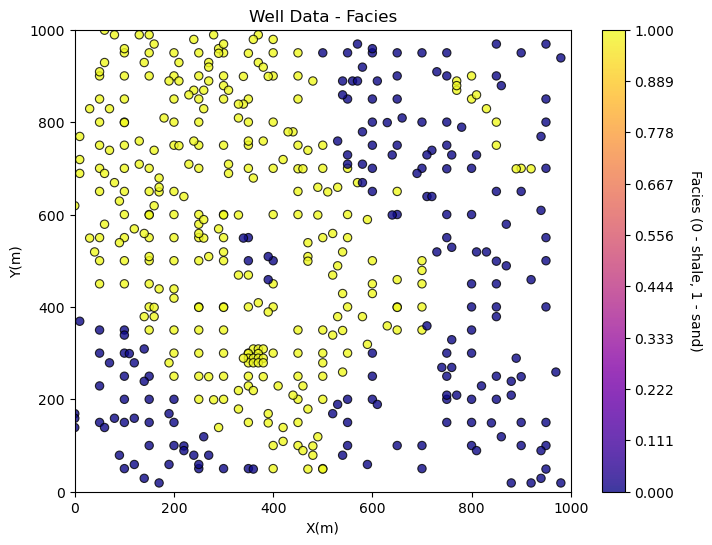

In [49]:
xmin = 0.0; xmax = 1000.0               # range of x values
ymin = 0.0; ymax = 1000.0               # range of y values

xsiz = 10; ysiz = 10
nx = 100; ny = 100
xmn = 5; ymn = 5

cmap = plt.cm.plasma                    # color map
GSLIB.locmap(df,'X','Y','Facies',xmin,xmax,ymin,ymax,0,1,'Well Data - Facies','X(m)','Y(m)','Facies (0 - shale, 1 - sand)',cmap,'locmap_facies')

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare functions

Here's a function to correct a trend model for probability closure.

In [52]:
def correct_trend(trend):
    ny = trend.shape[0]
    nx = trend.shape[1]
    ncut = trend.shape[2]
    for iy in range(0,ny):
        for ix in range(0,nx):
            sum = 0.0
            for ic in range(0,ncut):
                sum = sum + trend[iy,ix,ic]
            if sum > 0.0:
                for icut in range(0,ncut):
                    trend[iy,ix,ic] = trend[iy,ix,ic] / sum
    return trend

For this example lets just assume the indicator variograms for the 2 facies, 0 is shale and 1 is sand.  We declare a list and then add the variograms in the order of the categories in the thresh and global cdf arrays.

In [55]:
ncut = 2                                   # number of facies
thresh = [0,1]                             # the facies categories
gcdf = [0.4,0.6]                           # the global proportions of the categories
varios = []                                # the variogram list
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=50,hmin1=40)) # shale indicator variogram
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=50,hmin1=40)) # sand indicator variogram

Now let's just specify the other kriging parameters.

In [58]:
nxdis = 1; nydis = 1                       # block kriging discretizations, 1 for point kriging
ndmin = 0; ndmax = 10                      # minimum and maximum data for kriging 
radius = 100                                # maximum search distance
ktype = 1                                  # kriging type, 0 - simple, 1 - ordinary
ivtype = 0                                 # variable type, 0 - categorical, 1 - continuous
tmin = -999; tmax = 999;                   # data trimming limits

Let's make a very simple trend model just based on the x coordinate and correct the trend to sum to one.  See I'm only modifying the shale proportion and using the correction to adjust the sand.  This is quite ad hoc and just for demonstration. 

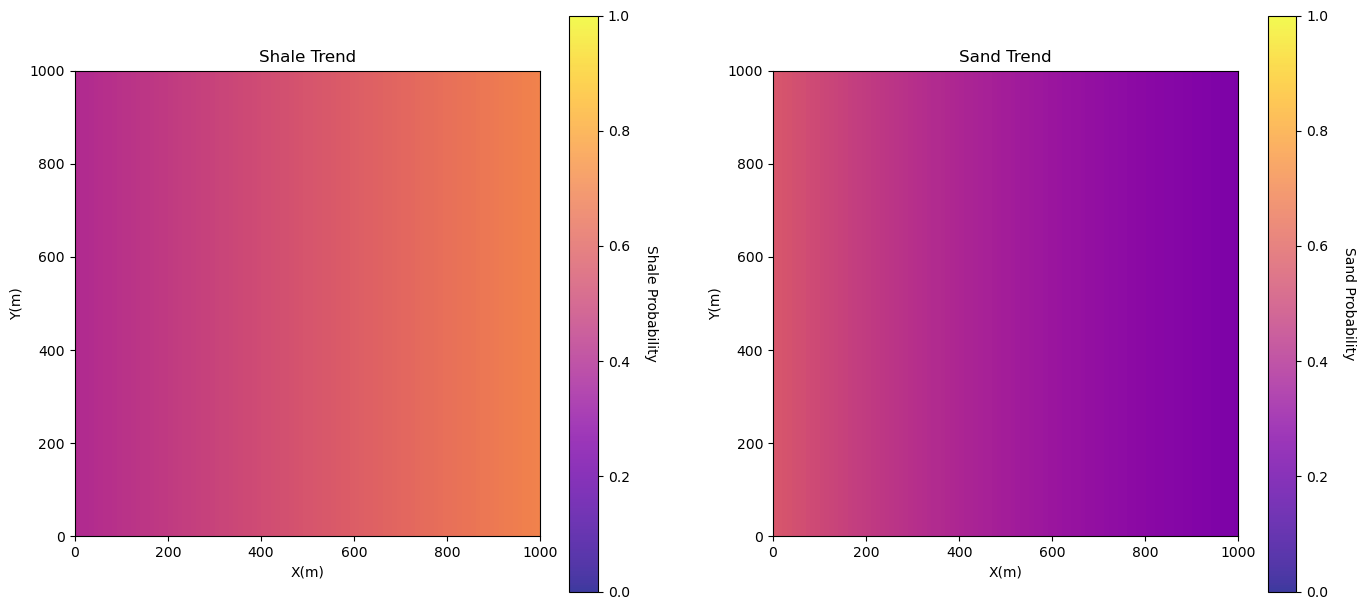

In [61]:
trend = np.zeros((nx,ny,ncut)); trend[:,:,0] = 0.8; trend[:,:,1] = 0.2
for iy in range(0,ny):
    for ix in range(0,nx):
        trend[iy,ix,0] = 0.4 + (ix/nx) * 0.3
trend = correct_trend(trend)

plt.subplot(121)
GSLIB.pixelplt_st(trend[:,:,0],xmin,xmax,ymin,ymax,xsiz,0.0,1.0,'Shale Trend','X(m)','Y(m)','Shale Probability',cmap)

plt.subplot(122)
GSLIB.pixelplt_st(trend[:,:,1],xmin,xmax,ymin,ymax,xsiz,0.0,1.0,'Sand Trend','X(m)','Y(m)','Sand Probability',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

Now we are ready to perform indicator kriging.

In [64]:
ikmap = geostats.ik2d(df,'X','Y','Facies',ivtype,0,2,thresh,gcdf,trend,tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz,
         ndmin,ndmax,radius,ktype,vario=varios)

Data for ik2d: Variable column Facies
  Number   = 480
Setting up rotation matrices for variogram and search
Working on the kriging
   currently on estimate 0
   currently on estimate 1000
   currently on estimate 2000
   currently on estimate 3000
   currently on estimate 4000
   currently on estimate 5000
   currently on estimate 6000
   currently on estimate 7000
   currently on estimate 8000
   currently on estimate 9000


Let's see what we just calculated. Recall with indicato-based methods, we do not get a single estimate nor realization, but the entire local CDF.  In this case we get the probabability of shale and sand at all locations.

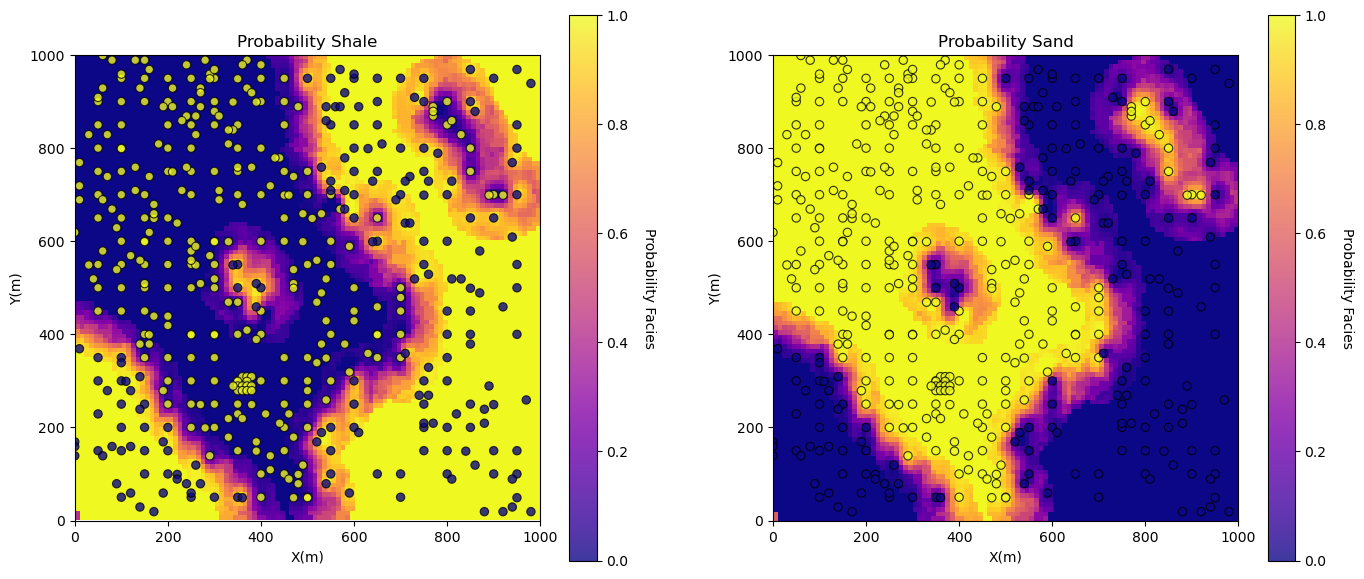

In [67]:
plt.subplot(221)
GSLIB.locpix_st(ikmap[:,:,0],xmin,xmax,ymin,ymax,xsiz,0.0,1.0,df,'X','Y','Facies','Probability Shale','X(m)','Y(m)','Probability Facies',cmap)

plt.subplot(222)
GSLIB.locpix_st(ikmap[:,:,1],xmin,xmax,ymin,ymax,xsiz,0.0,1.0,df,'X','Y','Facies','Probability Sand','X(m)','Y(m)','Probability Facies',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.5, wspace=0.2, hspace=0.2)
plt.show()

This is a basic demonstration of indicator kriging in Python.

I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)